In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [7]:
cases_data = pandas.read_csv('../data/us-states.csv')
newyork_cases_data = cases_data[cases_data['fips'] == 36]

FileNotFoundError: [Errno 2] File ../data/us-states.csv does not exist: '../data/us-states.csv'

In [5]:
newyork_cases_data

NameError: name 'newyork_cases_data' is not defined

In [6]:
plt.plot(newyork_cases_data['date'], newyork_cases_data['cases'])

NameError: name 'newyork_cases_data' is not defined

In [85]:
def realdata(state, population):
    cases_data = pandas.read_csv('./data/us-states.csv')
    state_data = cases_data[cases_data['state'] == state]
    
    index = []
    dates = []
    s = []
    i = []
    r = []
    d = []
    
    last_data = None
    for j, (idx, data) in enumerate(state_data.iterrows()):
        index.append(j)
        dates.append(data['date'])
        s.append(population - data['cases'])
        
        if last_data is None:
            i.append(data['cases'])
            r.append(0)
            d.append(data['deaths'])
            last_data = data
            continue
        
        i.append(data['cases'] - last_data['cases'])
        r.append(0)
        d.append(data['deaths'] - last_data['deaths'])
        last_data = data
    
    return pandas.DataFrame({'date': dates, 'S': s, 'I': i, 'R': r, 'D': d}, index=index)

In [58]:
GLOBAL_RECOVERY_PERIOD = 14

def sird(s0, i0, infection_rate, death_rate, n_iterations=100, recovery_period=GLOBAL_RECOVERY_PERIOD):
    index = [0]
    s = [s0]
    i = [i0]
    ci = [i0]
    r = [0]
    d = [0]
    
    for t in range(1, n_iterations):
        index.append(t)
        
        # number of new infection cases detected today
        n_infected_today = infection_rate * s[t - 1] * i[t - 1]
        
        # number of people that died today
        n_died_today = death_rate * i[t - 1]
        
        # infected are cured after 14 days
        n_recovered_today = 0
        if t >= recovery_period:
            n_recovered_today = i[t - recovery_period] - n_died_today
        
        s.append(s[t - 1] - n_infected_today)
        i.append(i[t - 1] + n_infected_today - n_recovered_today - n_died_today)
        r.append(r[t - 1] + n_recovered_today)
        d.append(d[t - 1] + n_died_today)
        
    return pandas.DataFrame({'S': s, 'I': i, 'R': r, 'D': d}, index=index)

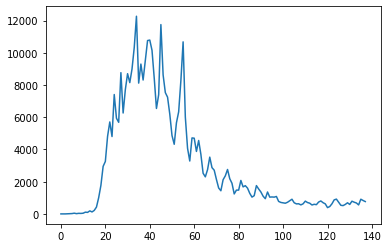

In [97]:
newyork = realdata('New York', 8.4 * (10**6))
plt.plot(newyork.index, newyork['I'])

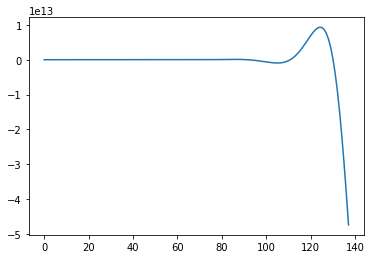

In [96]:
estimated_newyork = sird(8.4*(10**6), 1000, 0.0143, 0.0065, 138)
plt.plot(estimated_newyork.index, estimated_newyork['I'])